In [3]:
import sqlalchemy
import pandas as pd
from components.charts import heatmap_chart
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
engine = sqlalchemy.create_engine('sqlite:///stock_etf.db')

In [5]:
data = pd.read_sql_query(
    "SELECT * FROM stockData", engine, parse_dates="Date")

In [6]:
portfolio_ratios = pd.DataFrame({
    'CSCO/AES': (data["CSCO"]/data["AES"]),
    'AFL/PPBI': (data["AFL"]/data["PPBI"]),
    'BRO/EXR': (data["BRO"]/data["EXR"]),
    'CDNS/BURL': (data["CDNS"]/data["BURL"]),
    'GNTX/AX': (data["GNTX"]/data["AX"]),
    'RAMP/AEE': (data["RAMP"]/data["AEE"]),
})

In [7]:
portfolio_C_C_returns = ((portfolio_ratios - portfolio_ratios.shift(1)) / portfolio_ratios.shift(1))*100

In [8]:
portfolio_C_C_returns.tail(1)

,CSCO/AES,AFL/PPBI,BRO/EXR,CDNS/BURL,GNTX/AX,RAMP/AEE
2297,-0.374502,1.403466,-1.013622,-0.489615,2.108644,-2.948266


In [9]:
def DOR (pairs): 
    pair_list = pairs.split()
    descriptive_statistics = pd.DataFrame()
    for pair in pair_list:
        print(pairs)
    
        pair_statistics = pd.DataFrame({
        pair: {'Mean' : portfolio_C_C_returns[pair].mean(),
            'Variance' : portfolio_C_C_returns[pair].var(),
            'Std' : portfolio_C_C_returns[pair].std(),
            'Skew' : portfolio_C_C_returns[pair].skew(),
            'Kurtosis' : portfolio_C_C_returns[pair].kurtosis(),
            'Min' : portfolio_C_C_returns[pair].min(),
            'Max' : portfolio_C_C_returns[pair].max()},
        })
        
        descriptive_statistics = pd.concat([descriptive_statistics, pair_statistics], axis=1)
        
    return descriptive_statistics

In [10]:
DOR('CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE')

CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE
CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE
CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE
CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE
CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE
CSCO/AES   AFL/PPBI   BRO/EXR   CDNS/BURL   GNTX/AX   RAMP/AEE


,CSCO/AES,AFL/PPBI,BRO/EXR,CDNS/BURL,GNTX/AX,RAMP/AEE
Mean,0.037350,0.046768,0.038856,0.095009,0.028859,0.037656
Variance,4.623891,3.980459,2.968259,7.408667,7.224445,8.482922
Std,2.150324,1.995109,1.722864,2.721887,2.687833,2.912546
Skew,0.734125,0.622304,-0.409057,-0.015204,2.069222,0.659631
Kurtosis,15.347786,11.849472,8.936738,9.808837,33.565518,10.073580
Min,-15.544905,-11.686866,-16.870425,-19.749577,-16.007727,-21.808032
Max,26.411898,22.101412,9.974450,24.556737,42.943512,23.381846


CSCO/AES


,CSCO/AES
Mean,0.037350
Variance,4.623891
Std,2.150324
Skew,0.734125
Kurtosis,15.347786
Min,-15.544905
Max,26.411898


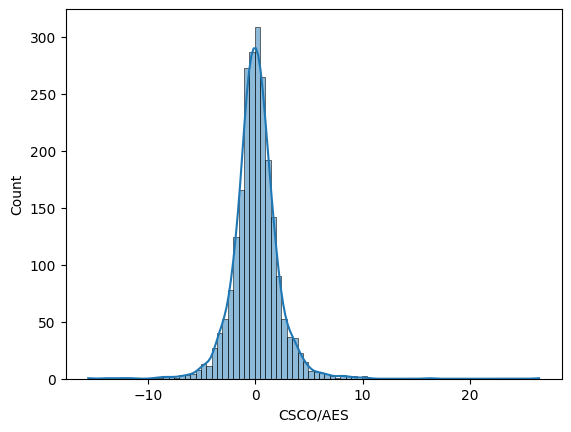

In [11]:
sns.histplot(data=portfolio_C_C_returns['CSCO/AES'], binwidth=0.5, kde=True)
DOR('CSCO/AES')

AFL/PPBI


,AFL/PPBI
Mean,0.046768
Variance,3.980459
Std,1.995109
Skew,0.622304
Kurtosis,11.849472
Min,-11.686866
Max,22.101412


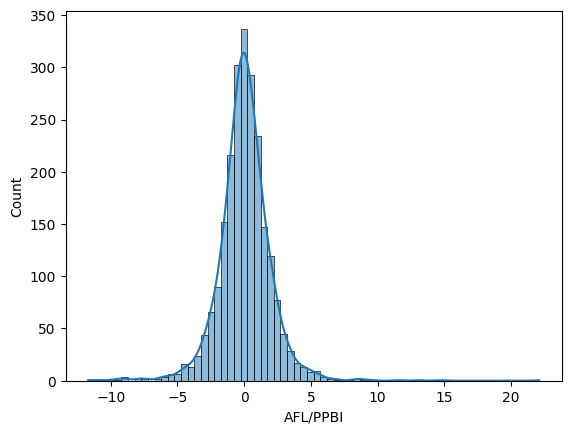

In [12]:
sns.histplot(data=portfolio_C_C_returns['AFL/PPBI'], binwidth=0.5, kde=True)
DOR('AFL/PPBI')

BRO/EXR


,BRO/EXR
Mean,0.038856
Variance,2.968259
Std,1.722864
Skew,-0.409057
Kurtosis,8.936738
Min,-16.870425
Max,9.974450


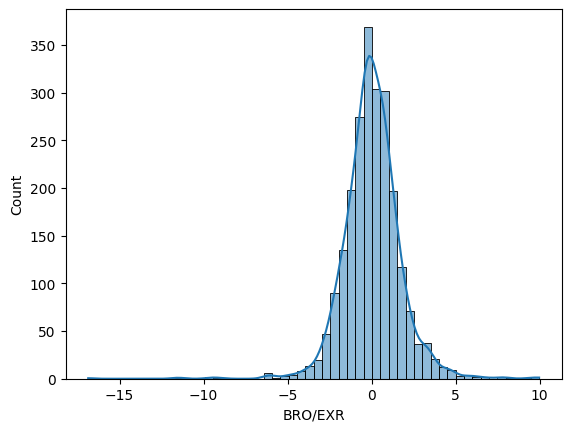

In [13]:
sns.histplot(data=portfolio_C_C_returns['BRO/EXR'], binwidth=0.5, kde=True)
DOR('BRO/EXR')

CDNS/BURL


,CDNS/BURL
Mean,0.095009
Variance,7.408667
Std,2.721887
Skew,-0.015204
Kurtosis,9.808837
Min,-19.749577
Max,24.556737


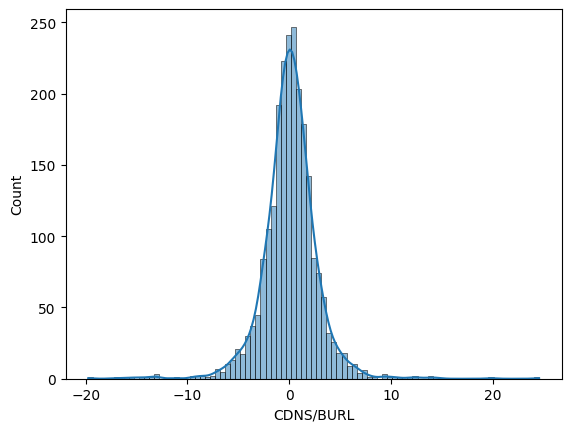

In [14]:
sns.histplot(data=portfolio_C_C_returns['CDNS/BURL'], binwidth=0.5, kde=True)
DOR('CDNS/BURL')

RAMP/AEE


,RAMP/AEE
Mean,0.037656
Variance,8.482922
Std,2.912546
Skew,0.659631
Kurtosis,10.073580
Min,-21.808032
Max,23.381846


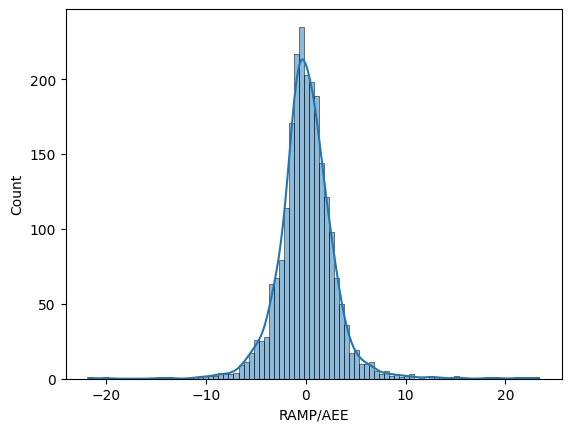

In [15]:
sns.histplot(data=portfolio_C_C_returns['RAMP/AEE'], binwidth=0.5, kde=True)
DOR('RAMP/AEE')

GNTX/AX


,GNTX/AX
Mean,0.028859
Variance,7.224445
Std,2.687833
Skew,2.069222
Kurtosis,33.565518
Min,-16.007727
Max,42.943512


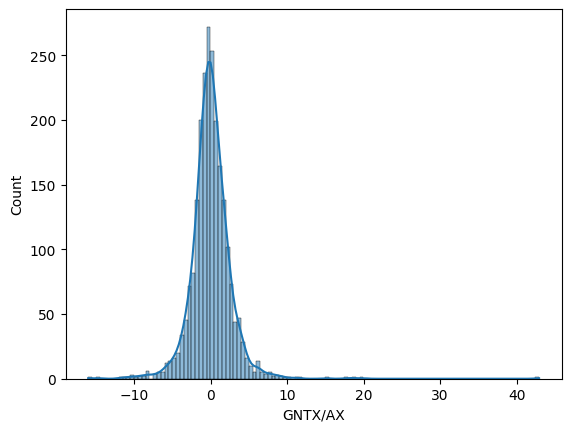

In [16]:
sns.histplot(data=portfolio_C_C_returns['GNTX/AX'], binwidth=0.5, kde=True)
DOR('GNTX/AX')

In [17]:
corr_check = portfolio_ratios.corr(method='spearman').round(2)

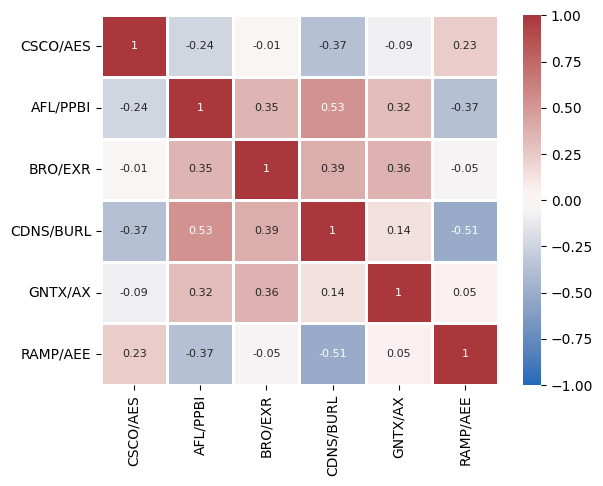

In [18]:
heatmap_chart(corr_check)

In [19]:
corr_check

,CSCO/AES,AFL/PPBI,BRO/EXR,CDNS/BURL,GNTX/AX,RAMP/AEE
CSCO/AES,1.00,-0.24,-0.01,-0.37,-0.09,0.23
AFL/PPBI,-0.24,1.00,0.35,0.53,0.32,-0.37
BRO/EXR,-0.01,0.35,1.00,0.39,0.36,-0.05
CDNS/BURL,-0.37,0.53,0.39,1.00,0.14,-0.51
GNTX/AX,-0.09,0.32,0.36,0.14,1.00,0.05
RAMP/AEE,0.23,-0.37,-0.05,-0.51,0.05,1.00
